# Computational Mechanics Sheet Q2

In [2]:
# Importing useful libraries, setting plot styles
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm # For colourful contour plots

plt.rcParams['text.usetex'] = True # Plots have LaTeX
plt.style.use('seaborn-v0_8-whitegrid') # Plots look better (in my opinion)

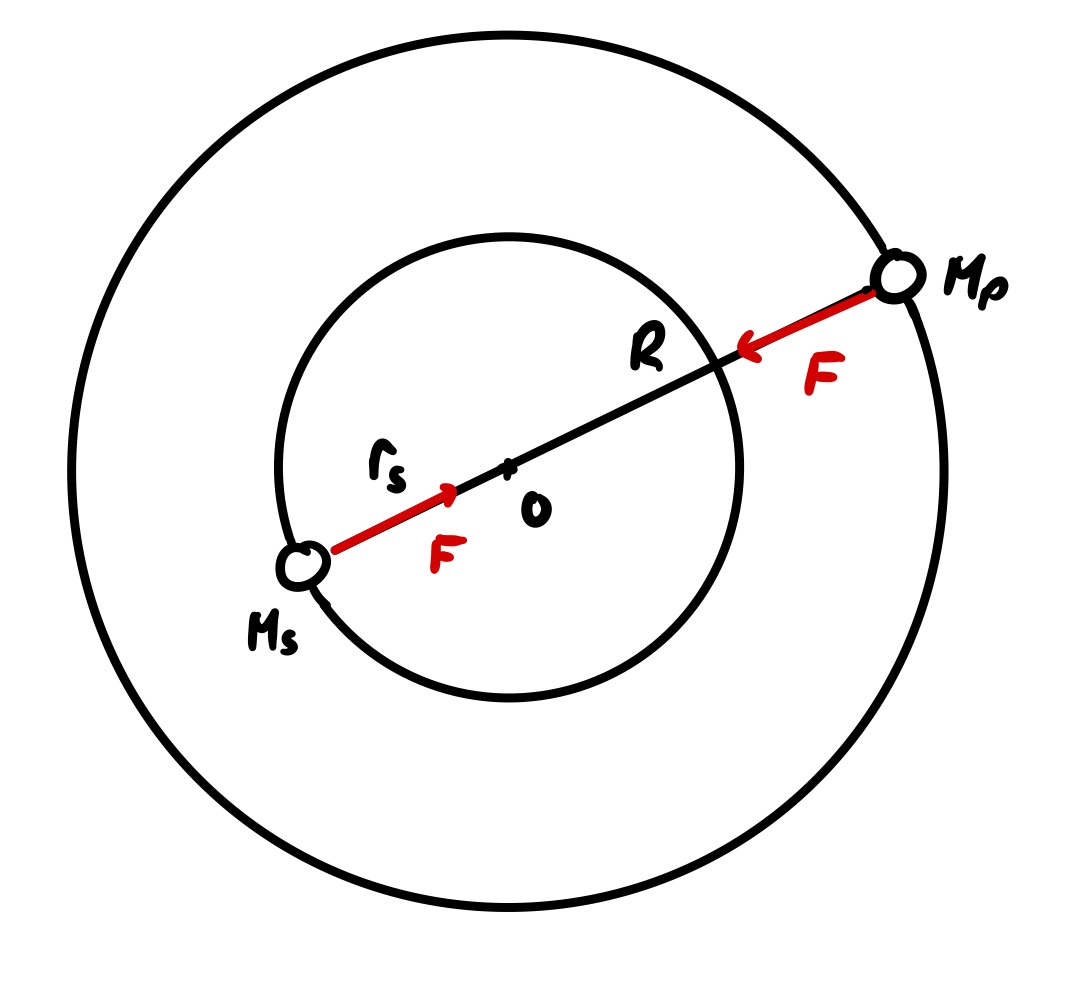

In [3]:
from IPython.display import Image
img = Image(filename='img/q2-a.jpg', width=300)
display(img)

In the diagram above, $F$ is determined by Newton's law of gravitation:
$$F = \frac{G M_P M_S}{(r_S + R)^2}$$
For the point $O$ to be the COM, we have the condition:
$$M_S \, r_S = M_P R \quad \Rightarrow \quad r_S = \frac{M_P}{M_S}R$$
Combining the above two equations:
$$F = \frac{G M_P M_S}{R^2(1 + M_P/M_S)^2}$$
This force must provide exactly the centripetal force $m \omega^2 r$ for either body, since they are in uniform circular motion. For instance, on the planet, we may write:
$$\frac{G M_P M_S}{R^2(1 + M_P/M_S)^2} = M_P \, \Omega^2 R$$
$$ \Rightarrow \quad \Omega^2 = \frac{G M_S}{R^3(1 + M_P/M_S)^2}$$

We have an orthonormal basis:
$$\hat{\boldsymbol{e}}_1 = \cos (\Omega t) \hat{\boldsymbol{x}} + \sin (\Omega t)\hat{\boldsymbol{y}}$$
$$\hat{\boldsymbol{e}}_2 = -\sin (\Omega t) \hat{\boldsymbol{x}} + \cos (\Omega t)\hat{\boldsymbol{y}}$$
$$\hat{\boldsymbol{e}}_3 = \hat{\boldsymbol{z}}$$
If the position of $A$ is given (in this basis) by $\boldsymbol{r} = r_i \hat{\boldsymbol{e}}_i$ (with a sum implied over $i = 1, 2 ,3$), then the time derivatives of $\boldsymbol{r}$ may be written as:
$$\frac{d \boldsymbol{r}}{dt} = \dot{r}_i \hat{\boldsymbol{e}}_i + r_i \dot{\hat{\boldsymbol{e}}}_i$$
$$\frac{d^2 \boldsymbol{r}}{dt^2} = \ddot{r}_i \hat{\boldsymbol{e}}_i + 2\dot{r}_i \dot{\hat{\boldsymbol{e}}}_i +  r_i \ddot{\hat{\boldsymbol{e}}}_i$$
We can find the derivatives of the basis vectors first, starting with $\hat{\boldsymbol{e}}_1$:
$$\dot{\hat{\boldsymbol{e}}}_1 = -\Omega \sin (\Omega t) \hat{\boldsymbol{x}} + \Omega \cos (\Omega t) \hat{\boldsymbol{y}} = \Omega \hat{\boldsymbol{e}}_2$$
$$\ddot{\hat{\boldsymbol{e}}}_1 = -\Omega^2 \cos (\Omega t) \hat{\boldsymbol{x}} - \Omega ^2 \sin (\Omega t ) \hat{\boldsymbol{y}} = -\Omega^2 \hat{\boldsymbol{e}}_1$$
And for $\hat{\boldsymbol{e}}_2$:
$$\dot{\hat{\boldsymbol{e}}}_2 = -\Omega \cos (\Omega t) \hat{\boldsymbol{x}} - \Omega \sin (\Omega t) \hat{\boldsymbol{y}} = -\Omega \hat{\boldsymbol{e}}_1$$
$$\ddot{\hat{\boldsymbol{e}}}_2 = \Omega^2 \sin (\Omega t) \hat{\boldsymbol{x}} - \Omega ^2 \cos (\Omega t ) \hat{\boldsymbol{y}} = -\Omega^2 \hat{\boldsymbol{e}}_2$$
And for $\hat{\boldsymbol{e}}_3$:
$$\dot{\hat{\boldsymbol{e}}}_3 = 0$$
$$\ddot{\hat{\boldsymbol{e}}}_3 = 0$$

We can now develop the above expressions a little more. Note that terms $\dot{\boldsymbol{r}}$ and $\ddot{\boldsymbol{r}}$ refer to velocity and acceleration in the rotating frame:
$$\ddot{r}_i \hat{\boldsymbol{e}}_i \equiv \ddot{\boldsymbol{r}}$$
For the second term:
$$2\dot{r}_i \dot{\hat{\boldsymbol{e}}}_i = 2(\dot{r}_1 \Omega \hat{\boldsymbol{e}}_2 - \dot{r}_2 \Omega \hat{\boldsymbol{e}}_1) = - 2 \Omega \epsilon_{ijk} \hat{\boldsymbol{e}}_i (\dot{\boldsymbol{r}})_j \delta_{3k} = - 2 \Omega \epsilon_{ijk} \hat{\boldsymbol{e}}_i (\dot{\boldsymbol{r}})_j (\hat{\boldsymbol{z}})_k = - 2 \Omega \dot{\boldsymbol{r}} \times \hat{\boldsymbol{z}} = 2 \Omega \hat{\boldsymbol{z}} \times \dot{\boldsymbol{r}}$$
Finally,
$$r_i \ddot{\hat{\boldsymbol{e}}}_i = -\Omega^2 (r_1 \hat{\boldsymbol{e}}_1 + r_2 \hat{\boldsymbol{e}}_2)$$
We can write:
$$\hat{\boldsymbol{z}} \times \boldsymbol{r} = -r_2 \hat{\boldsymbol{e}}_1 + r_1 \hat{\boldsymbol{e}}_2$$
$$\Rightarrow \quad \hat{\boldsymbol{z}} \times (\hat{\boldsymbol{z}} \times \boldsymbol{r}) = -r_1 \hat{\boldsymbol{e}}_1 - r_2 \hat{\boldsymbol{e}}_2$$
So, 
$$r_i \ddot{\hat{\boldsymbol{e}}}_i = \Omega^2 \hat{\boldsymbol{z}} \times (\hat{\boldsymbol{z}} \times \boldsymbol{r})$$
Combining all of the above into the expression for $d^2 \boldsymbol{r}/dt^2$:
$$\frac{d^2 \boldsymbol{r}}{dt^2} = \ddot{\boldsymbol{r}} + 2 \Omega \hat{\boldsymbol{z}} \times \dot{\boldsymbol{r}} + \Omega^2 \hat{\boldsymbol{z}} \times (\hat{\boldsymbol{z}} \times \boldsymbol{r}) $$
Again, this disagrees with the problem sheet. So I am prob doing something wrong here since this stuff is quite confusing to me. Anyways, I think the second term corresponds to the negative of the Coriolis acceleration, since when switched to the other side, it corresponds to the fictitious Coriolis acceleration that the particle appears to undergo in the rotating frame. The third term is the same kinda case but for the centrifugal fictitious force.

The left hand side of the above equation represents the acceleration relative to the inertial frame, so we can equate this to $\boldsymbol{F}/m$, where $\boldsymbol{F}$ is the force acting on the asteroid of mass $m$. This expression may be written as $-\nabla V_g$, where:
$$V_g = -\frac{G M_S}{|\boldsymbol{r} - \boldsymbol{r}_S|}-\frac{G M_P}{|\boldsymbol{r} - \boldsymbol{r}_P|}$$
Using the earlier expression for $\Omega^2$, we can rewrite the numerators:
$$ G M_S = R^3 \Omega^2 \left(1 + \frac{M_P}{M_S}\right)^2 \quad \text{and} \quad G M_P = R^3 \Omega^2 \left(1 + \frac{M_P}{M_S}\right)^2 \frac{M_P}{M_S}$$
$$ \Rightarrow \quad V_g = - R^3 \Omega^2 \left(1 + \frac{M_P}{M_S}\right)^2 \left(\frac{1}{|\boldsymbol{r} - \boldsymbol{r}_S|} + \frac{M_P / M_S}{|\boldsymbol{r} - \boldsymbol{r}_P|}\right)$$
Plugging this into the earlier expression in accelerations, and moving the rightmost term to the other side:
$$ - \nabla V_g - \Omega^2 \hat{\boldsymbol{z}} \times (\hat{\boldsymbol{z}} \times \boldsymbol{r}) = \ddot{\boldsymbol{r}} + 2 \Omega \hat{\boldsymbol{z}} \times \dot{\boldsymbol{r}} $$
We notice that the second term on the right may be rewritten as:
$$- \Omega^2 \hat{\boldsymbol{z}} \times (\hat{\boldsymbol{z}} \times \boldsymbol{r}) = \Omega^2 (r_1 \hat{\boldsymbol{e}}_1 + r_2 \hat{\boldsymbol{e}}_2)$$
Now, look at the following potential $V_r$:
$$V_r = -\Omega^2 \left(\frac{r_1^2 + r_2^2}{2}\right) \quad \Rightarrow \quad -\nabla V_r = \Omega^2 (r_1 \hat{\boldsymbol{e}}_1 + r_2 \hat{\boldsymbol{e}}_2)$$
So,
$$\ddot{\boldsymbol{r}} + 2 \Omega \hat{\boldsymbol{z}} \times \dot{\boldsymbol{r}} = -\nabla V_g - \nabla V_r = -\nabla(V_r + V_g) = - \nabla V_{eff}$$
where:
$$V_{eff} \equiv V_r + V_g = - \Omega^2 R^2 \left( \frac{r_1^2 + r_2^2}{2 R^2} + R \left(1 + \frac{M_P}{M_S}\right)^2 \left( \frac{1}{|\boldsymbol{r} - \boldsymbol{r}_S|} + \frac{M_P}{M_S}\frac{1}{|\boldsymbol{r} - \boldsymbol{r}_P|}\right)\right)$$
We can now plot this as a contour, using units in which $\Omega = 1$, $R = 1$. We define $\alpha \equiv M_P / M_S$, such that $\boldsymbol{r}_S = -\alpha \hat{\boldsymbol{e}}_1$, $\boldsymbol{r}_P = \hat{\boldsymbol{e}}_1$. We are given $r_3 = 0$, so $|\boldsymbol{r} - \boldsymbol{r}_S| = \sqrt{(r_1 + \alpha)^2 + r_2^2}$ and $|\boldsymbol{r} - \boldsymbol{r}_P| = \sqrt{(r_1 - 1)^2 + r_2^2}$


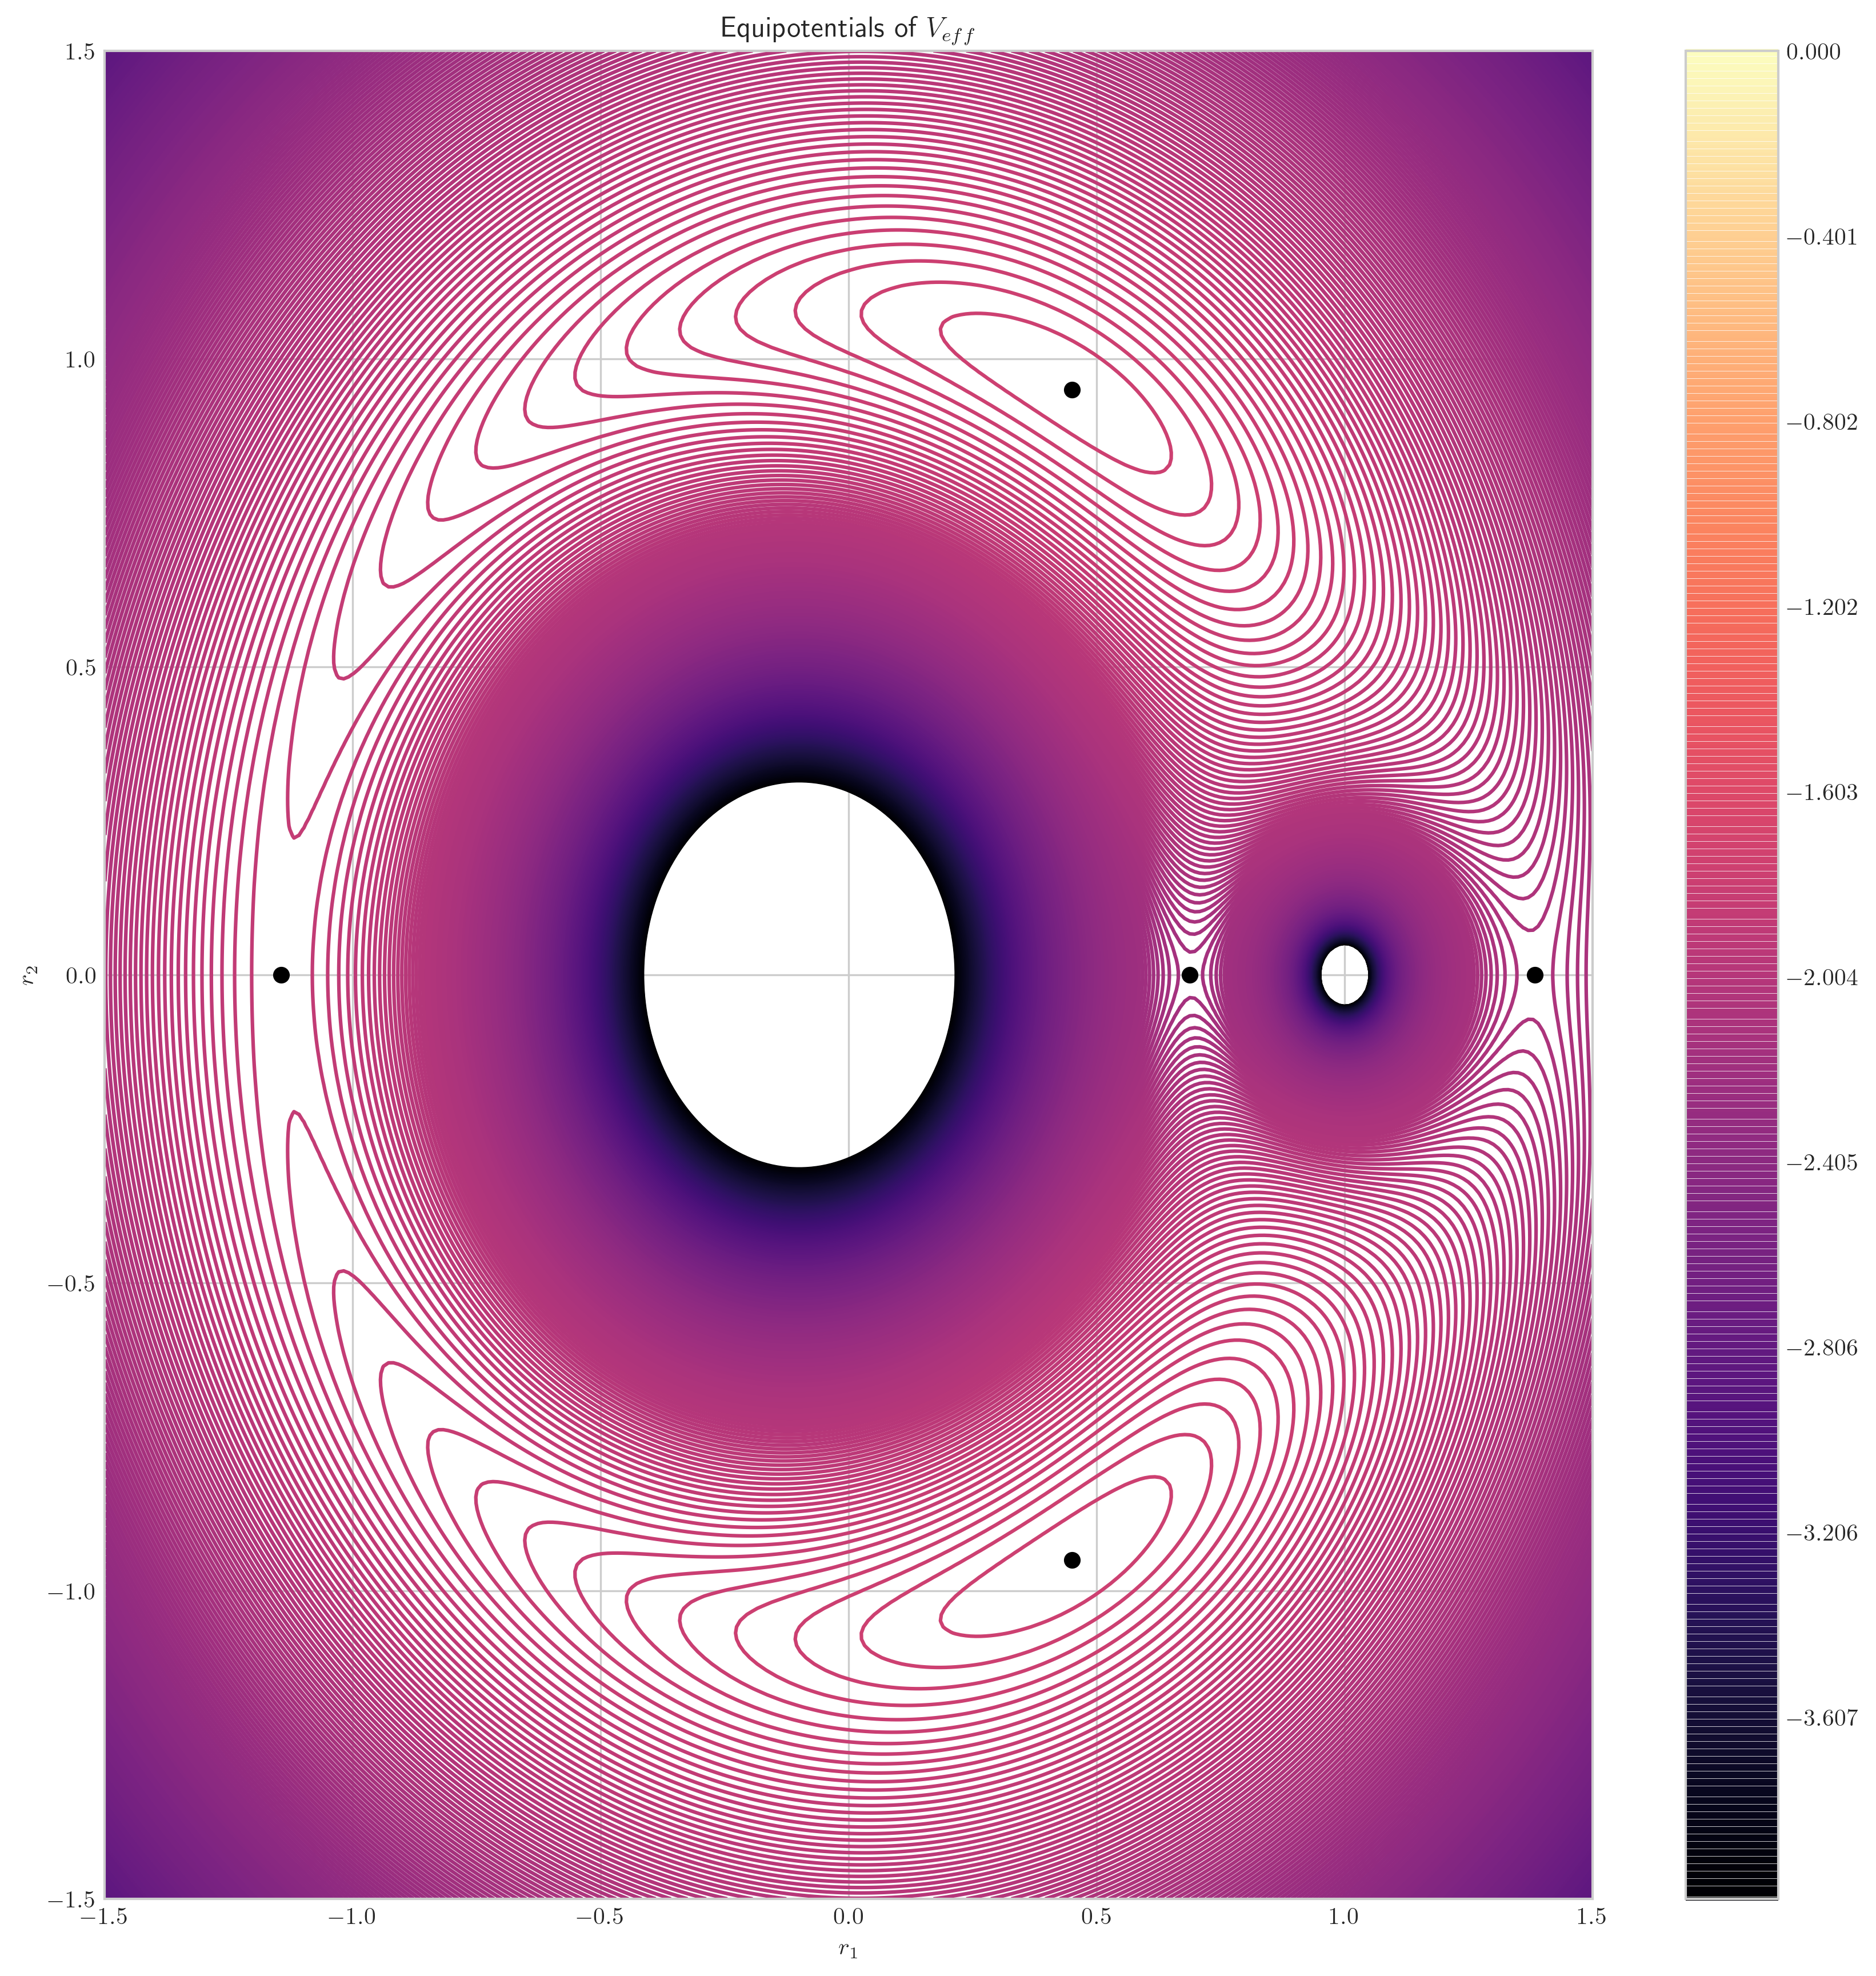

In [4]:
# Defining the contour function
def V_eff(r_1, r_2, alpha):
    # Calculating modulo terms
    r_r_s = np.sqrt((r_1 + alpha)**2 + r_2**2) # For |r - r_s|
    r_r_p = np.sqrt((r_1 - 1)**2 + r_2**2) # For |r - r_p|
    return -1 * ((r_1 ** 2 + r_2 ** 2)/2 + (1 + alpha)**2 * (1/ r_r_s + alpha / r_r_p))

# Setting a couple of plot parameters
fig = plt.figure(figsize=(14, 14), dpi=300)
plt.title('Equipotentials of $V_{eff}$')
plt.xlabel('$r_1$')
plt.ylabel('$r_2$')

# Defining domain of r_1, r_2, making grid of values
r_1 = np.linspace(-1.5, 1.5, 300)
r_2 = np.linspace(-1.5, 1.5, 300)
r_1, r_2 = np.meshgrid(r_1, r_2)
alpha = 0.1

# Contour levels - ie not to include the super low values at points near to star/planet
levels = np.linspace(-4, 0, 500)

CS = plt.contour(r_1, r_2, V_eff(r_1, r_2, alpha), levels=levels, cmap='magma')
CB = fig.colorbar(CS)

# Some labels
plt.scatter([-1.145, 0.45, 0.45, 0.687, 1.383], [0, 0.95, -0.95, 0, 0], color='k')

The stationary points are denoted on the figure by little black dots. Now, for (one of) the maxima, I want to numerically solve the equation of motion detailed earlier, that being:
$$\ddot{\boldsymbol{r}} + 2 \Omega \hat{\boldsymbol{z}} \times \dot{\boldsymbol{r}} = - \nabla V_{eff}$$
Honestly though, I feel like I'd be better off just writing out the full equation of motion relative to the rotating frame, and solving this. FIrstly, we write the non-fictitious force (per unit mass) on the asteroid:
$$\frac{\boldsymbol{F}}{m} = -\frac{GM_P (\boldsymbol{r} - \boldsymbol{r}_P)}{|\boldsymbol{r} - \boldsymbol{r}_P|^3} - \frac{GM_S (\boldsymbol{r} - \boldsymbol{r}_S)}{|\boldsymbol{r} - \boldsymbol{r}_S|^3} = \frac{d^2 \boldsymbol{r}}{dt^2}$$
So,
$$-\frac{GM_P (\boldsymbol{r} - \boldsymbol{r}_P)}{|\boldsymbol{r} - \boldsymbol{r}_P|^3} - \frac{GM_S (\boldsymbol{r} - \boldsymbol{r}_S)}{|\boldsymbol{r} - \boldsymbol{r}_S|^3} = -\Omega^2 R^3 \left(1 + \frac{M_P}{M_S}\right)^2\left(\frac{M_P}{M_S}\frac{\boldsymbol{r} - \boldsymbol{r}_P}{|\boldsymbol{r} - \boldsymbol{r}_P|^3} + \frac{\boldsymbol{r} - \boldsymbol{r}_S}{|\boldsymbol{r} - \boldsymbol{r}_S|^3}\right)$$
Recall from earlier, $\alpha \equiv M_P / M_S$, and $\boldsymbol{r}_P = \hat{\boldsymbol{e}}_1, \boldsymbol{r}_S = - \alpha \hat{\boldsymbol{e}}_1$. We will also define $\beta \equiv \Omega^2 R^3 (1 + \alpha)^2$. Then, the earlier expression for acceleration in inertial frame is:
$$ - \beta \left(\alpha \left( \frac{\boldsymbol{r} - \hat{\boldsymbol{e}}_1}{|\boldsymbol{r} - \hat{\boldsymbol{e}}_1|^3} \right) + \frac{\boldsymbol{r} + \alpha \hat{\boldsymbol{e}}_1}{|\boldsymbol{r} + \alpha  \hat{\boldsymbol{e}}_1|^3} \right) = \ddot{\boldsymbol{r}} + 2 \Omega \hat{\boldsymbol{z}} \times \dot{\boldsymbol{r}} + \Omega^2 \hat{\boldsymbol{z}} \times (\hat{\boldsymbol{z}} \times \boldsymbol{r})$$
We can express the cross products on the RHS in terms of the basis vectors, and then break down the above formula component wise. Currently, we have a system of 3 2nd order ODEs, but by introducing variables $v_i = \dot{r}_i$, it becomes a system of 6 first order ODEs, which we can numerically solve using Scipy. Writing the above equation in terms of the new variables:
$$\text{Along } \hat{\boldsymbol{e}}_1 \qquad -\beta \left(\alpha \frac{r_1 - 1}{|\boldsymbol{r} - \hat{\boldsymbol{e}}_1|^3} + \frac{r_1 + \alpha}{|\boldsymbol{r} + \alpha  \hat{\boldsymbol{e}}_1|^3}\right) + 2 \Omega v_2 + \Omega^2 r_1 = \dot{v}_1$$
$$\text{Along } \hat{\boldsymbol{e}}_2 \qquad  -\beta \left(\alpha \frac{r_2}{|\boldsymbol{r} - \hat{\boldsymbol{e}}_1|^3} + \frac{r_2}{|\boldsymbol{r} + \alpha  \hat{\boldsymbol{e}}_1|^3}\right) - 2 \Omega v_1 + \Omega^2 r_2 = \dot{v}_2$$
$$\text{Along } \hat{\boldsymbol{e}}_3 \qquad -\beta \left(\alpha \frac{r_3}{|\boldsymbol{r} - \hat{\boldsymbol{e}}_1|^3} + \frac{r_3}{|\boldsymbol{r} + \alpha  \hat{\boldsymbol{e}}_1|^3}\right) = \dot{v}_1$$
I can now write this into a Python function as in Q1 - a little more tricky this time.

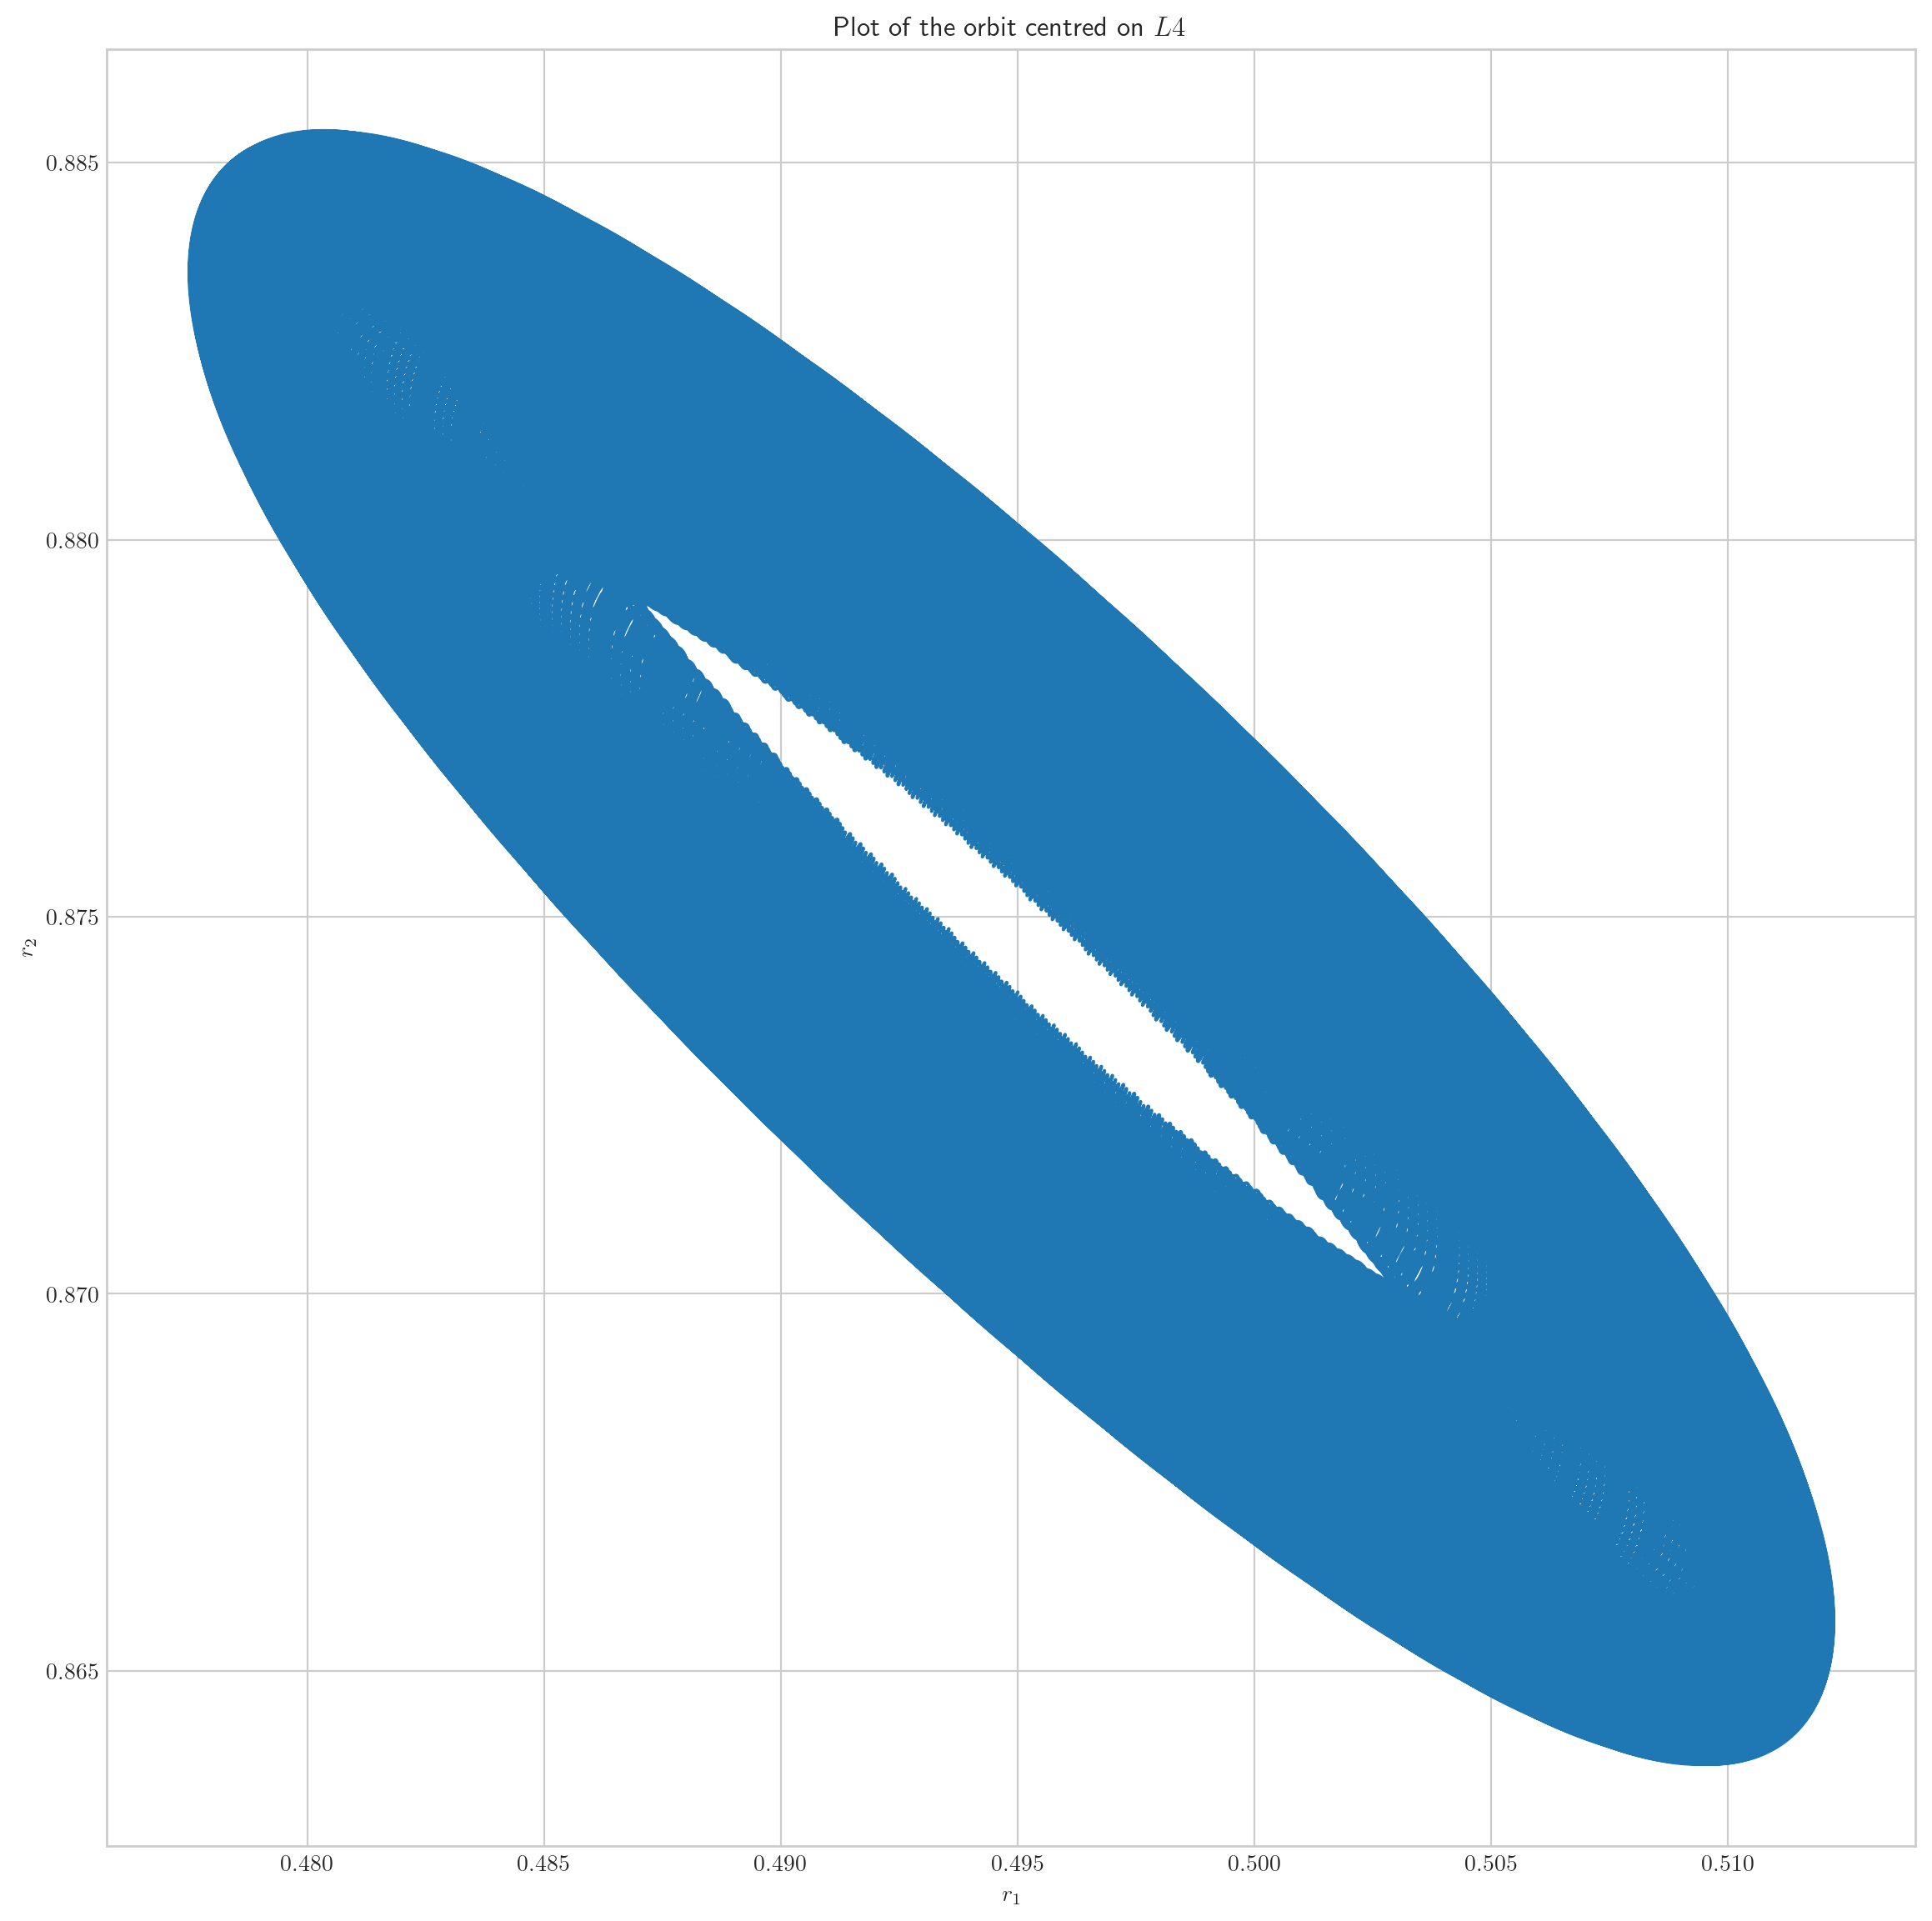

In [16]:
def ODE(y, t, alpha, beta):
    # Reading off variables from overarching vector
    r_1, r_2, r_3, v_1, v_2, v_3 = y
    
    # Distances that appear in denominators - powers included here!
    d_P3 = ((r_1 - 1)**2 + r_2 ** 2 + r_3 **2)**(3/2) # For r_P term
    d_S3 = ((r_1 + alpha)**2 + r_2 ** 2 + r_3 ** 2)**(3/2) # For r_S term

    # Derivatives of each v component
    dv_1 = -beta * (alpha * (r_1 - 1) / d_P3 + (r_1 + alpha) / d_S3) + 2 * v_2 + r_1
    dv_2 = -beta * (alpha * (r_2) / d_P3 + (r_2) / d_S3) - 2 * v_1 + r_2
    dv_3 = -beta * (alpha * (r_3) / d_P3 + (r_3) / d_S3)

    dydt = [v_1, v_2, v_3, dv_1, dv_2, dv_3]
    return dydt

# Setting a couple of plot parameters
fig = plt.figure(figsize=(14, 14), dpi=200)
plt.title('Plot of the orbit centred on $L4$')
plt.xlabel('$r_1$')
plt.ylabel('$r_2$')

t = np.linspace(0, 10000, 1000000) # All time values
y0 = [0.495, 0.874, 0, 0, 0, 0] # Initial conditions
alpha = 0.01
beta = (1 + alpha)**2

sol = odeint(ODE, y0, t, args = (alpha, beta))
plt.plot(sol[:, 0], sol[:, 1])
plt.show()

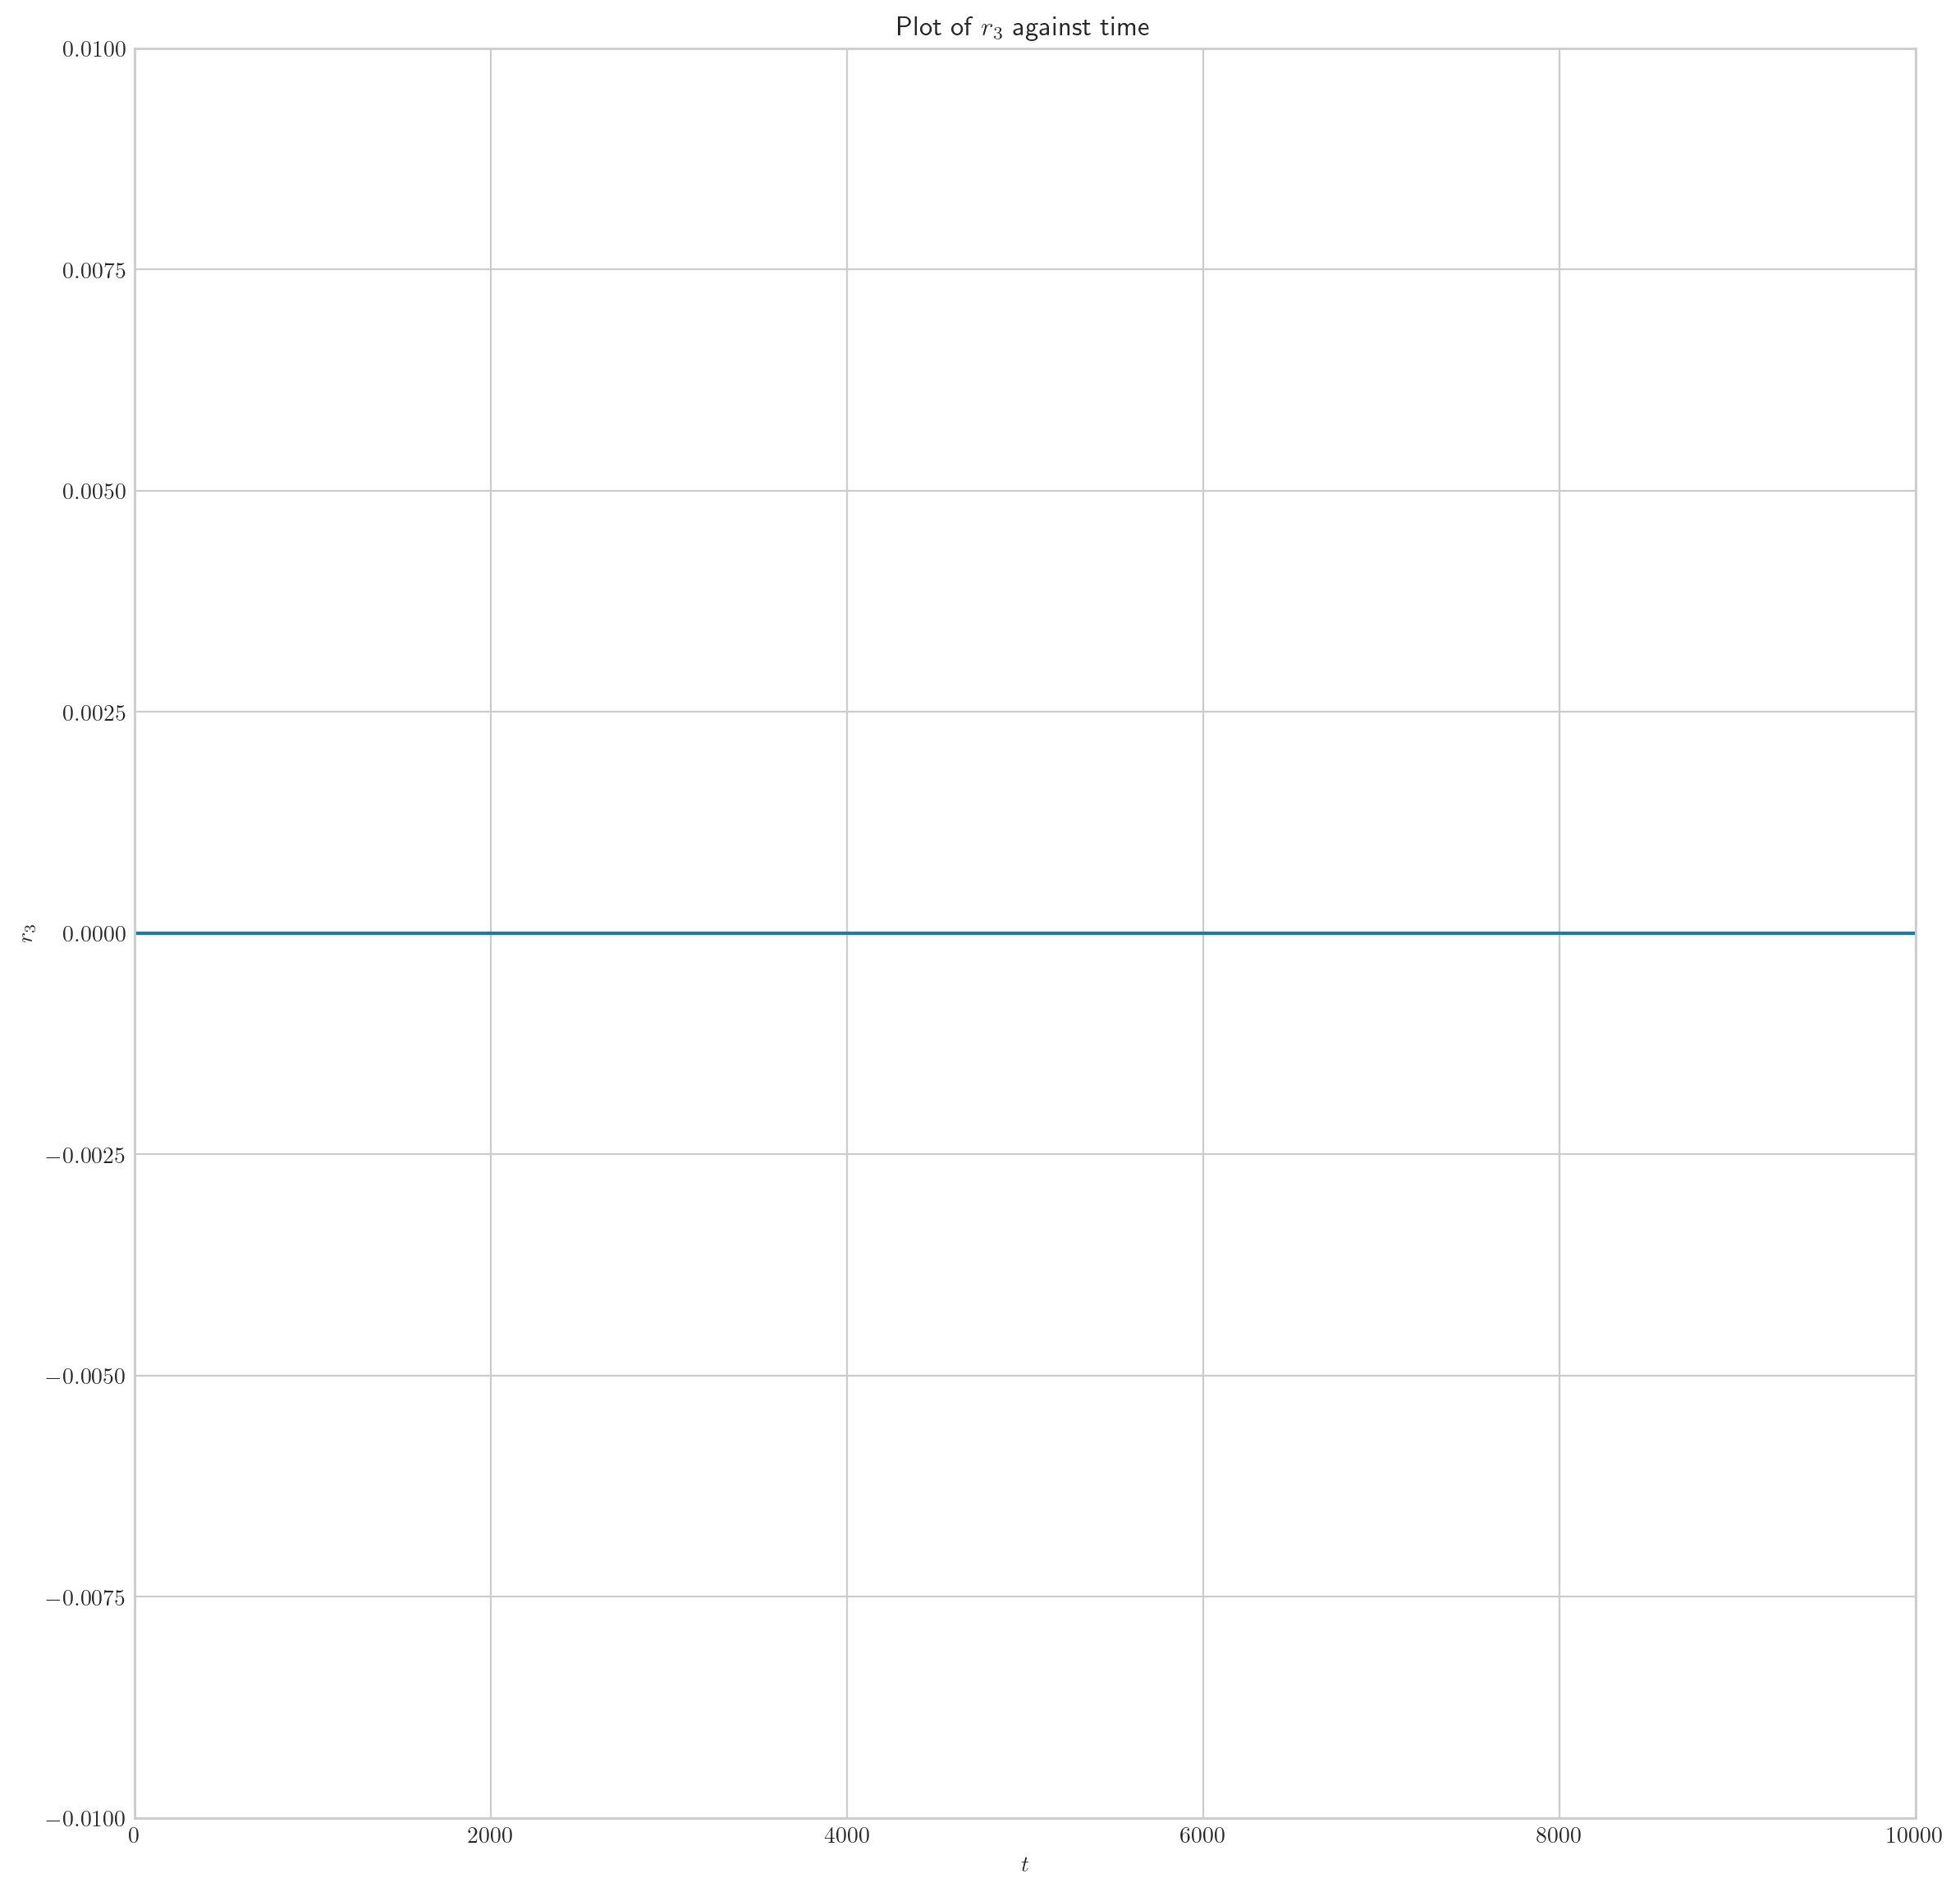

In [17]:
# We can check that the z component of r is 0 always:
fig = plt.figure(figsize=(14, 14), dpi=200)
plt.title('Plot of $r_3$ against time')
plt.xlabel('$t$')
plt.ylabel('$r_3$')
plt.xlim(0, 10000)
plt.ylim(-0.01, 0.01)

plt.plot(t, sol[:, 2])

Having verified that $r_3 = 0$ for the entire motion, we can calculate the distance from the original position $(i_1, i_2, i_3)$ as simply $\sqrt{(r_1 - i_1)^2 + (r_2 - i_2)^2}$. Plotting this:

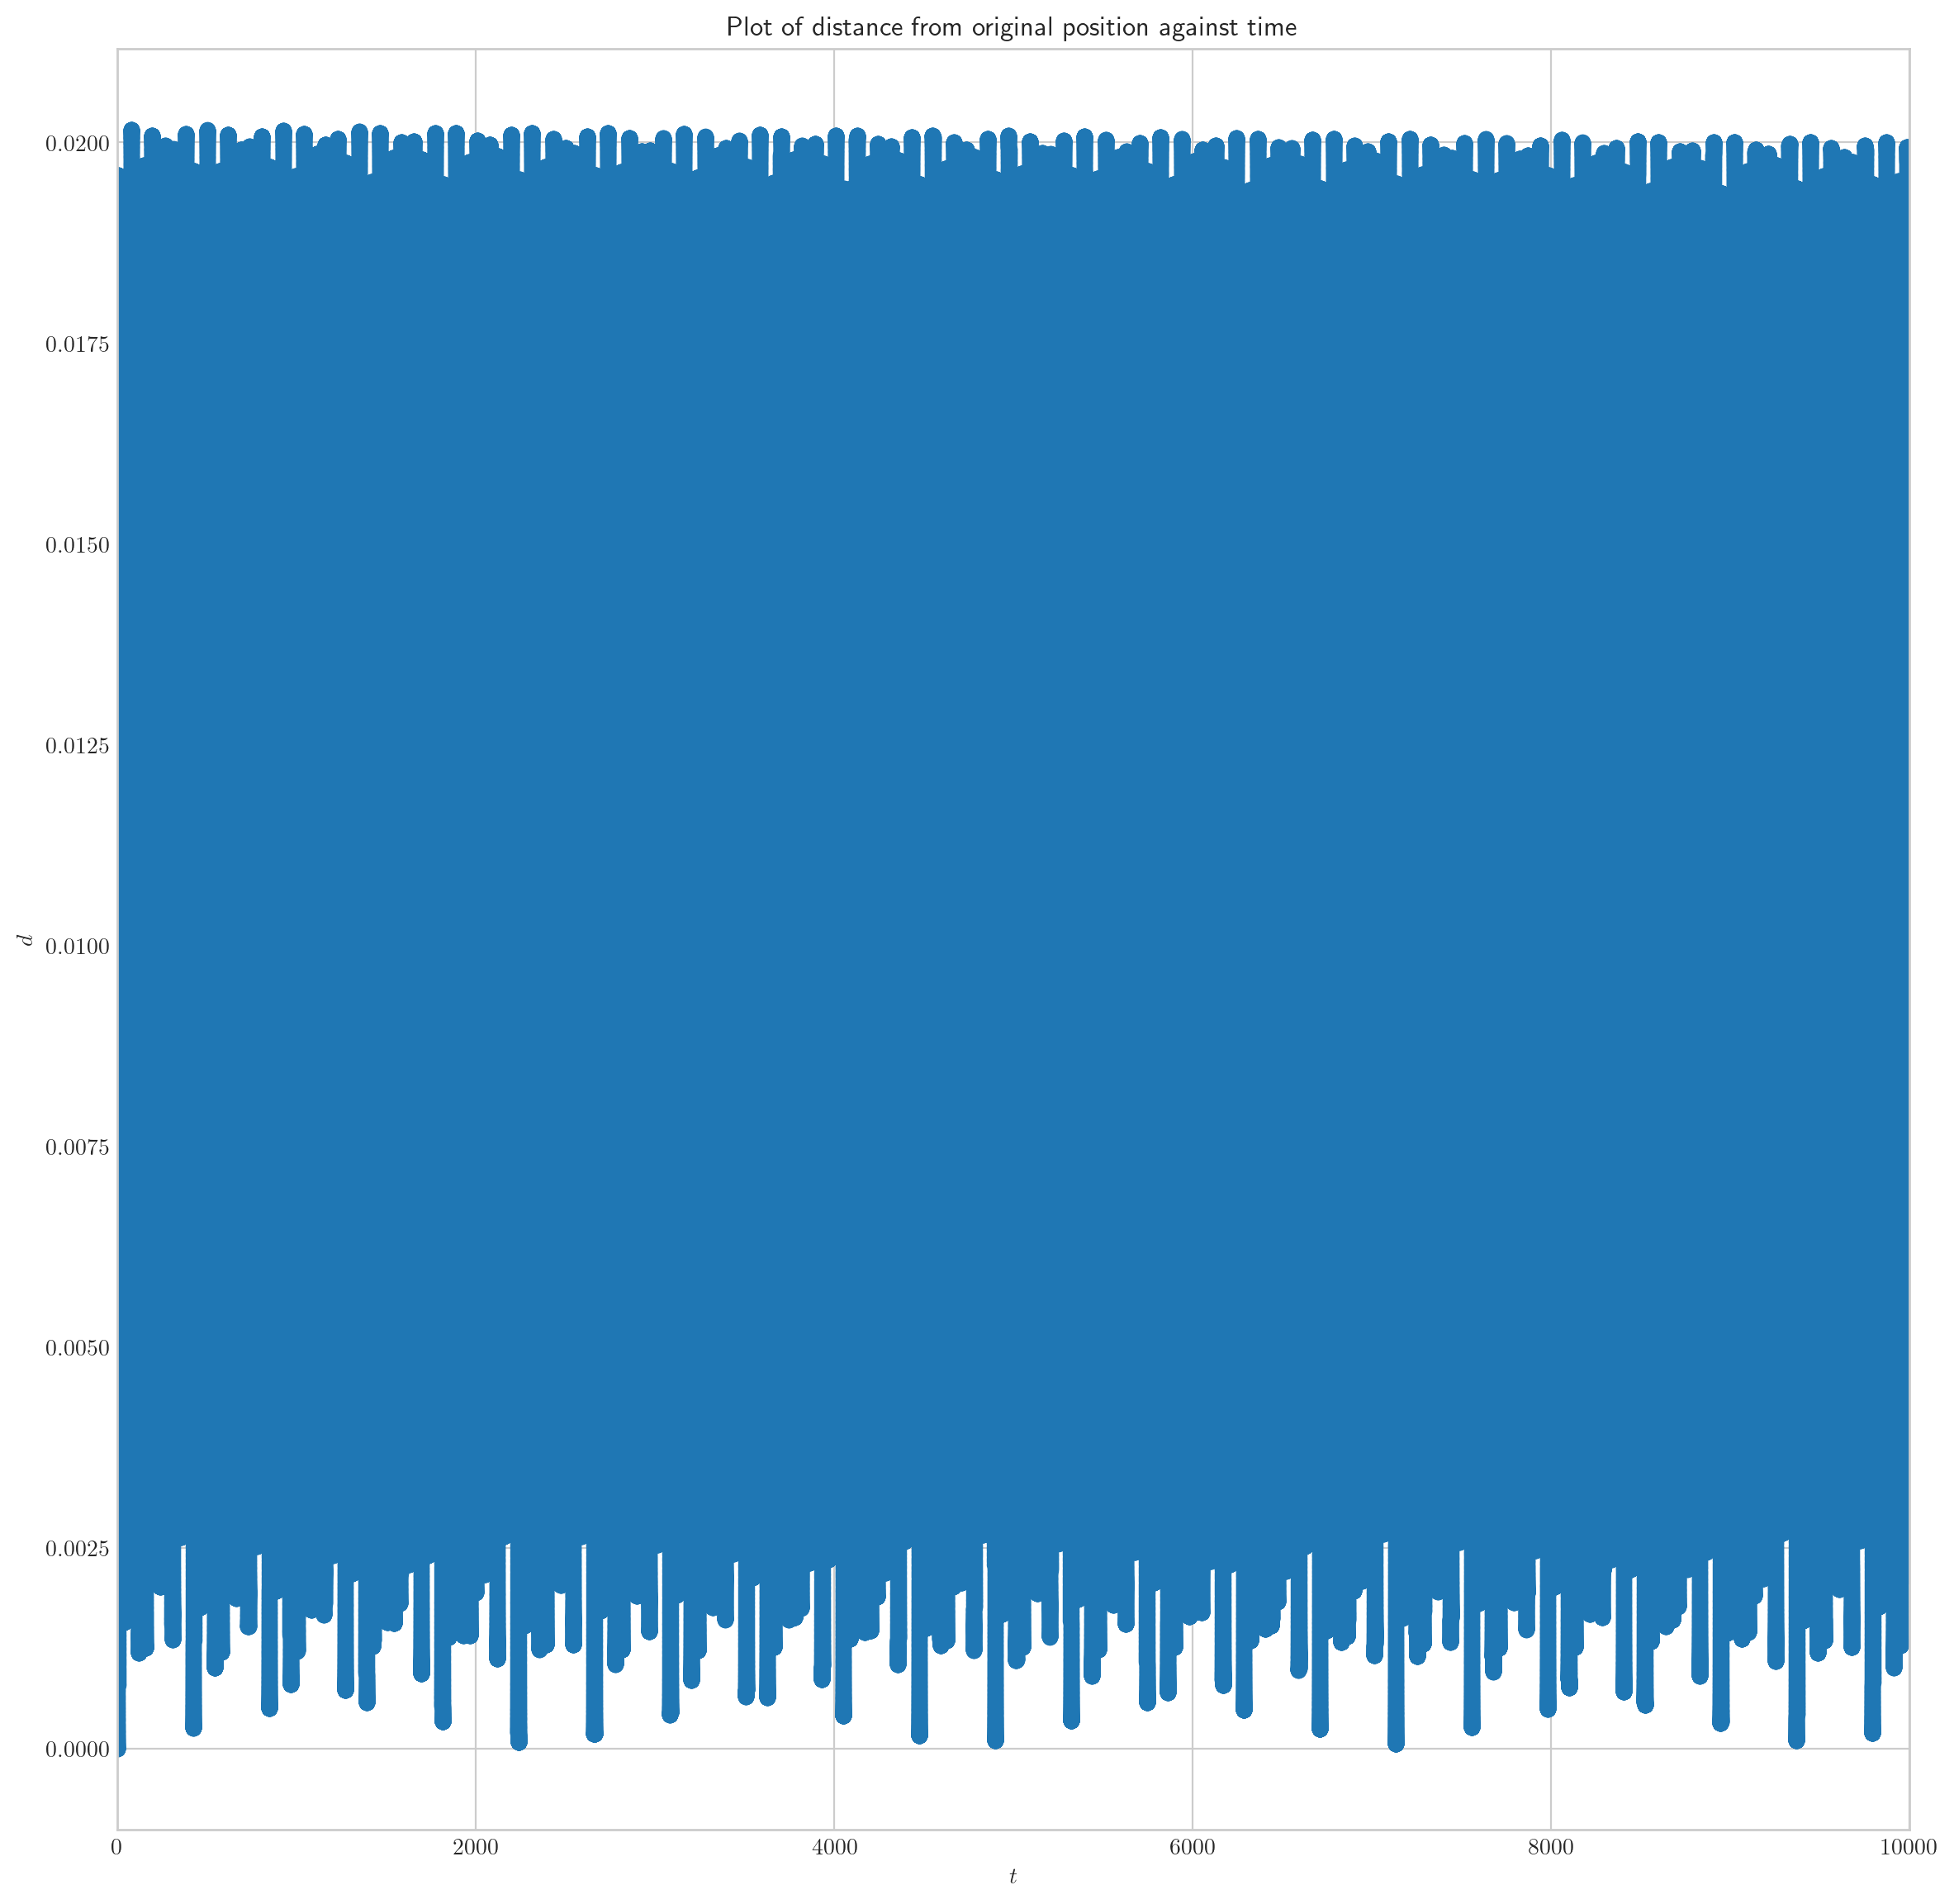

In [18]:
# We can also plot the distance from the original position against time
def dist(r_1, r_2, i_1, i_2):
    return np.sqrt((r_1 - i_1)**2 + (r_2 - i_2)**2)

d = dist(sol[:, 0], sol[:, 1], y0[0], y0[1])

fig = plt.figure(figsize=(14, 14), dpi=200)
plt.title('Plot of distance from original position against time')
plt.xlabel('$t$')
plt.ylabel('$d$')
plt.xlim(0, 10000)

plt.scatter(t, d)


On this plot immediately above, we can see the distance is almost always below $0.2$ units, so the orbit is effectively bounded for this range of times. The orbits look approximately elliptical, but its hard to say exactly. Not sure exactly how to tell if theyre closed too.

Since $V_{eff}$ is a maximum around the points $L4, L5$, it seems reasonable to say that it is not responsible for the boundedness of the orbits. Then, the only other term to which we can attribute the boundedness would be the Coriolis acceleration, represented by the $- 2 \Omega \hat{\boldsymbol{z}} \times \boldsymbol{r}$. This looks analogous to the magnetic force experienced by an electron moving in the inertial frame of reference, with the magnetic field $\boldsymbol{B}$ having a magnitude $2 \Omega / e$, and pointing along the positive $z$ axis.